(398, 284)
Percentage mismatched pixels is  1.3465213390898152


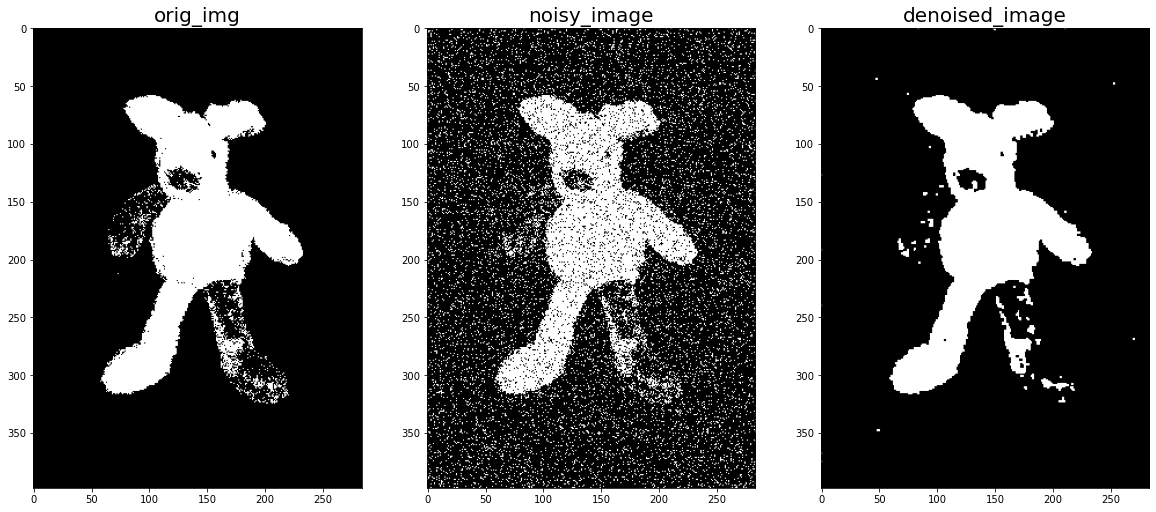

In [1]:
import numpy as np
import sys
from PIL import Image
import matplotlib.pyplot as plt

def log_prob(img, i, j):
    try:
        return img[i][j]
    except IndexError:
        return 0
    
def display_img_arr(img_arr, r, c, dim,titles_arr):
    fl = 0
    fig = plt.figure(figsize = dim)
    for i in range(r):
        for j in range(c):
            if len(img_arr) == fl:
                break
            ax1 = fig.add_subplot(r, c, fl + 1)
            ax1.set_title(titles_arr[fl], fontsize = 20)
            ax1.imshow(img_arr[fl], cmap = 'gray')
            fl = fl + 1
    plt.show()
    

def getprob(img, img2, i, j, w_e, w_s, y_val):
    res =  w_e * img[i][j] * y_val + w_s * y_val * (log_prob(img2, max(i-1,0), j)+ log_prob(img2, min(i+1,img2.shape[0]), j)+ log_prob(img2, i, max(j-1,0))+log_prob(img2, i, min(j+1,img2.shape[0])))
    return res


def denoise(img, w_e, w_s):
    img2 = np.copy(img) 
    for iters in range(10*img.shape[0]*img.shape[1]):
        i = np.random.randint(img.shape[0])
        j = np.random.randint(img.shape[1])
        img2[i][j] = 1
        if  getprob(img, img2, i, j, w_e, w_s, -1) > getprob(img, img2, i, j, w_e, w_s, 1):
            img2[i][j] = -1
    return img2

def mrf_denoise(img):
    # threshold
    img[np.where(img<128)] = -1
    img[np.where(img>=128)] = 1

    print(img.shape)
    noisy = img.copy()
    h, w = img.shape
    for i in range(h):
        for j in range(w):
            if np.random.rand() < 0.1:
                noisy[i][j] = -noisy[i][j]
                
    denoised_image = denoise(noisy, 8, 10)

    print ('Percentage mismatched pixels is ', (100.0 * np.sum(abs(img - denoised_image) / 2)) / np.size(img))
    display_img_arr([img,noisy,denoised_image], 1, 3, (20, 20), ['orig_img','noisy_image','denoised_image'])

img = np.asarray(Image.open('../images/teddy.jpg').convert("L")).astype(int)
img.flags.writeable = True
mrf_denoise(img)

(549, 462)
Percentage mismatched pixels is  0.9178435407943605


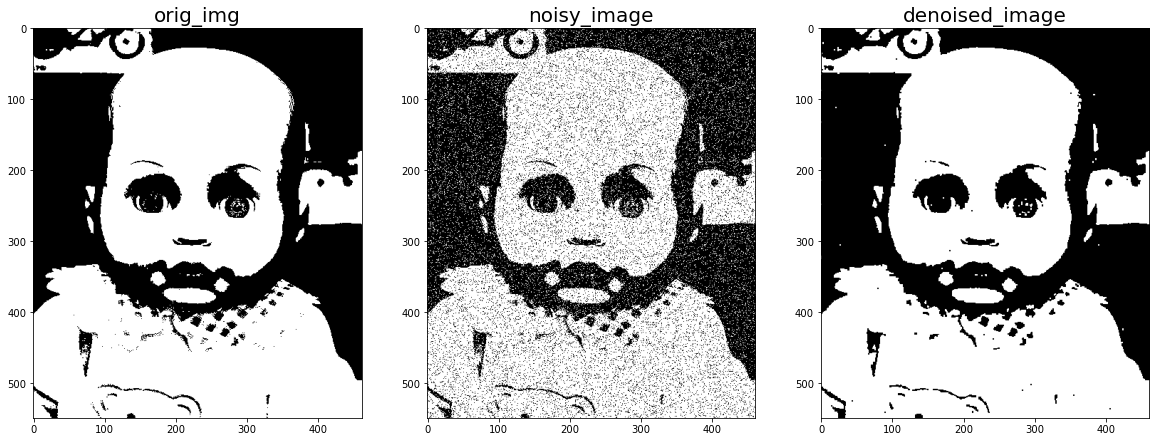

In [4]:
img = np.asarray(Image.open('../images/doll.jpg').convert("L")).astype(int)
img.flags.writeable = True
mrf_denoise(img)

(600, 450)
Percentage mismatched pixels is  5.45


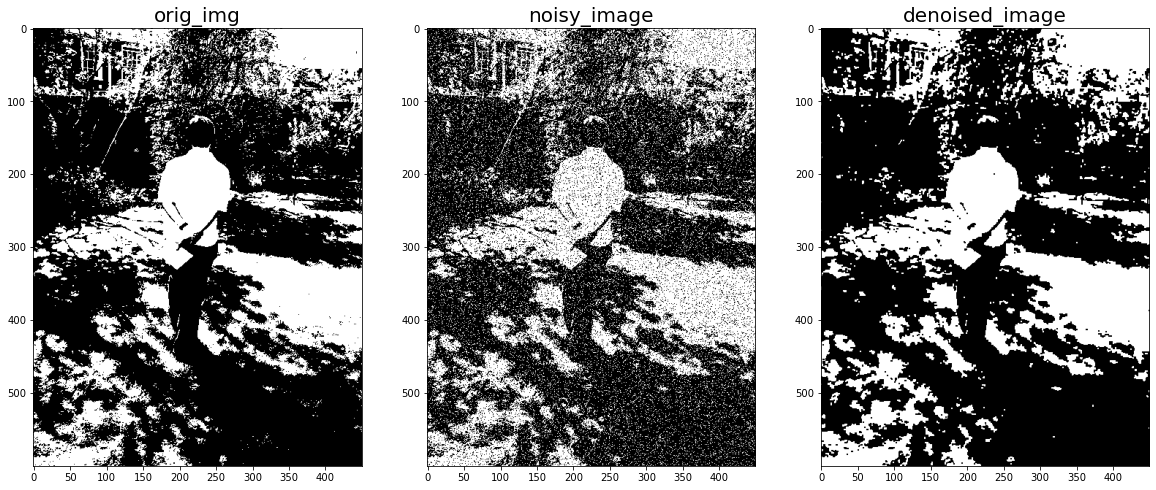

In [5]:
img = np.asarray(Image.open('../images/person7.jpg').convert("L")).astype(int)
img.flags.writeable = True
mrf_denoise(img)